In [1]:
#Observations & Inferences based on datatables and figures


## Importing and cleaning up repeat data 

In [168]:
%matplotlib notebook

In [169]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [170]:
study_results['Mouse ID'].unique()
total_mice = len(study_results['Mouse ID'].unique())
total_mice

249

In [171]:
#locating any mice with duplicate timepoints by Mouse ID
study_results_dup = study_results[study_results.duplicated(['Mouse ID','Timepoint'])]
study_results_dup

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
137,g989,0,45.000000,0
360,g989,5,47.570392,0
681,g989,10,49.880528,0
869,g989,15,53.442020,0
1111,g989,20,54.657650,1


In [172]:
#deleting mouse ID g898 due to duplicate timepoints
study_results.drop(study_results.loc[study_results["Mouse ID"]=='g989'].index, inplace=True)
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [173]:
#confirming that mouse g989 was deleted, should be one less than original total of 249 mice
study_results['Mouse ID'].unique()
total_mice = len(study_results['Mouse ID'].unique())
total_mice

248

In [174]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_results_clean = study_results
# Combine the data into a single dataset
combo_mouse_study = pd.merge(mouse_metadata, study_results_clean, on=['Mouse ID'])

# Display the data table for preview
combo_mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [175]:
# Checking the number of mice in the clean DataFrame.
combo_mouse_study['Mouse ID'].unique()
total_mice = len(combo_mouse_study['Mouse ID'].unique())
total_mice

248

In [176]:
for col in combo_mouse_study.columns:
    print(col)

Mouse ID
Drug Regimen
Sex
Age_months
Weight (g)
Timepoint
Tumor Volume (mm3)
Metastatic Sites


## Summary Statistics

In [177]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of 
#each drug regimen: 
regimen_tumor_volume = combo_mouse_study
regimen_tumor_volume = regimen_tumor_volume.groupby(['Drug Regimen'])

#mean
mean_tumor_vol = regimen_tumor_volume['Tumor Volume (mm3)'].mean()

#median
med_tumor_vol = regimen_tumor_volume['Tumor Volume (mm3)'].median()

#variance
var_tumor_vol = regimen_tumor_volume['Tumor Volume (mm3)'].var()

#standard deviation
std_tumor_vol = regimen_tumor_volume['Tumor Volume (mm3)'].std()

#SEM of the tumor volume
sem_tumor_vol = regimen_tumor_volume['Tumor Volume (mm3)'].sem()


# Assemble the resulting series into a single summary dataframe.
tumor_vol_stats = pd.DataFrame ({"Mean Tumor Volume": mean_tumor_vol,
                                "Median Tumor Volume":med_tumor_vol,
                                "Variance Tumor Volume":var_tumor_vol,
                                "STD Tumor Volume":std_tumor_vol,
                                "SEM Tumor Volume":sem_tumor_vol})

tumor_vol_stats.index.name = "Drug Regimen"

#formatting the df
tumor_vol_stats['Mean Tumor Volume'] = tumor_vol_stats['Mean Tumor Volume'].map("{:.2f}".format)
tumor_vol_stats['Median Tumor Volume'] = tumor_vol_stats['Median Tumor Volume'].map("{:.2f}".format)
tumor_vol_stats['Variance Tumor Volume'] = tumor_vol_stats['Variance Tumor Volume'].map("{:.2f}".format)
tumor_vol_stats['STD Tumor Volume'] = tumor_vol_stats['STD Tumor Volume'].map("{:.2f}".format)
tumor_vol_stats['SEM Tumor Volume'] = tumor_vol_stats['SEM Tumor Volume'].map("{:.2f}".format)

tumor_vol_stats


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,STD Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [178]:
# Generate a summary statistics table of mean, median, variance, 
#standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimen_tumor_vol_agg = combo_mouse_study

regimen_tumor_vol_agg = regimen_tumor_vol_agg.groupby(['Drug Regimen']).agg(
    {"Tumor Volume (mm3)":['mean', 'median','var','std','sem']})

regimen_tumor_vol_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

## Bar Chart with Pandas

<IPython.core.display.Javascript object>


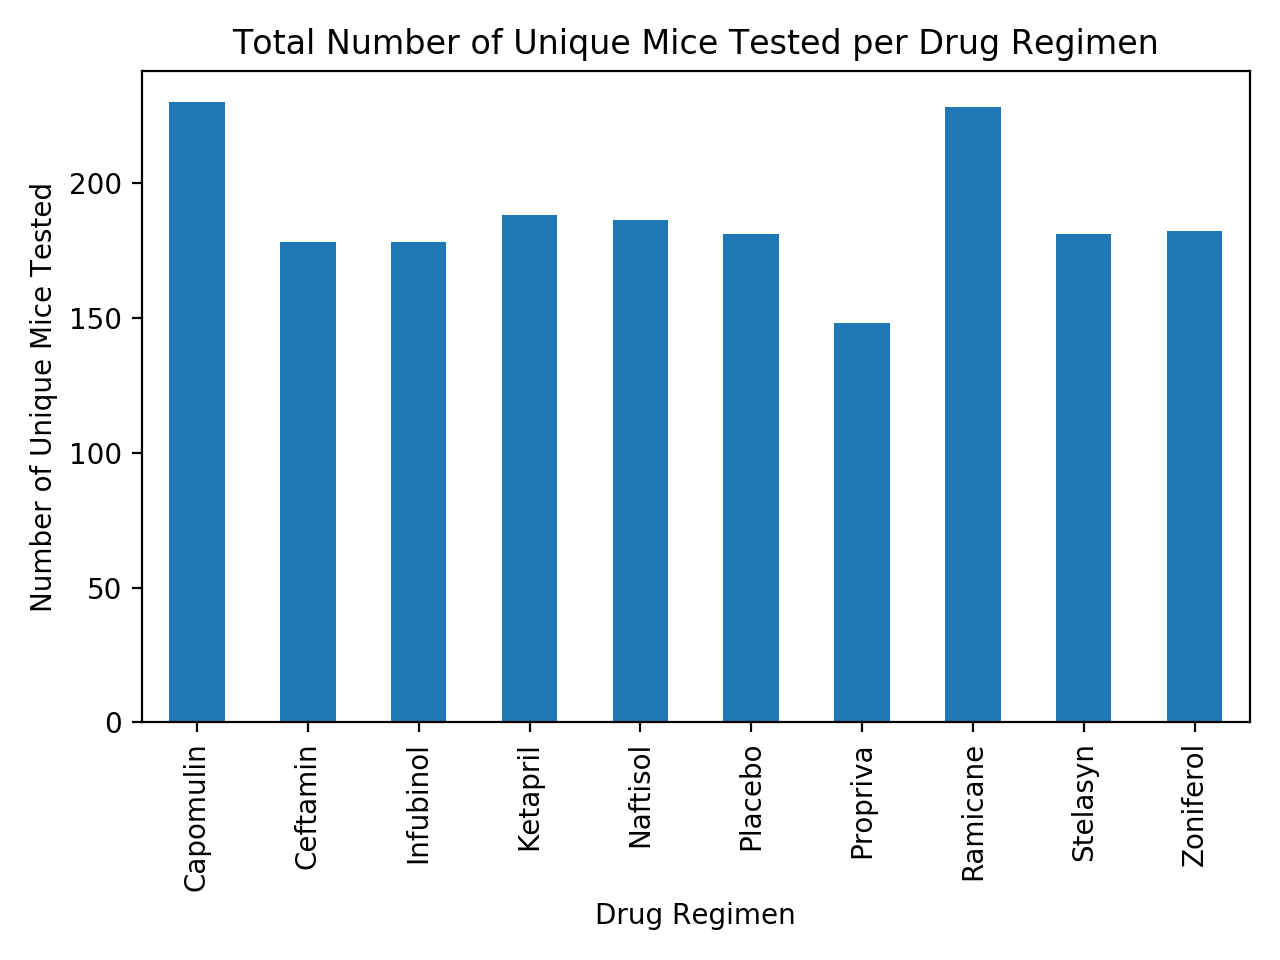

In [179]:
# Generate a bar plot showing the total number of 
#unique mice tested on each drug regimen using pandas.
mice_regimen = combo_mouse_study.groupby('Drug Regimen')

total_mice_regimen = mice_regimen['Mouse ID'].count()

#create bar chart with pandas
mice_regimen_chart = total_mice_regimen.plot(kind='bar')

#labels
mice_regimen_chart.set_xlabel("Drug Regimen")
mice_regimen_chart.set_ylabel("Number of Unique Mice Tested")
mice_regimen_chart.set_title("Total Number of Unique Mice Tested per Drug Regimen")

plt.show()
plt.tight_layout()

In [180]:
plt.clf()
plt.cla()
plt.close()

## Bar Chart with pyplot

<IPython.core.display.Javascript object>


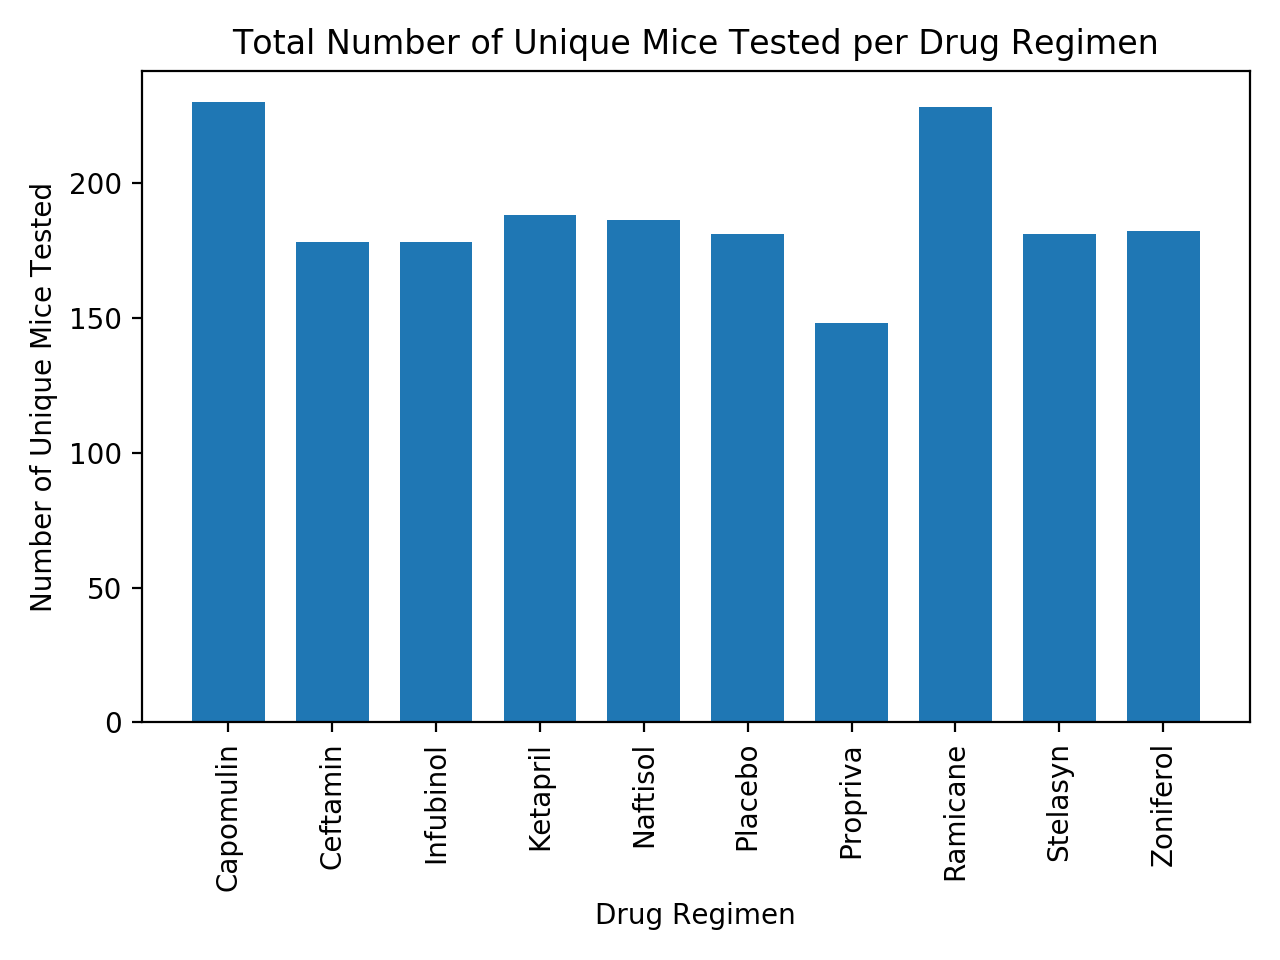

In [181]:
# Generate a bar plot showing the total number of 
#unique mice tested on each drug regimen using pyplot.

#getting regimens and mice count into lists
regimens = regimen_tumor_vol_agg.index.tolist()
mice_count = (combo_mouse_study.groupby(['Drug Regimen'])["Mouse ID"].count()).tolist()

#plotting iwth pyplot
x_axis = np.arange(len(mice_count))

x_axis = regimens
plt.bar(x_axis, mice_count, align="center", width = 0.7)
plt.title("Total Number of Unique Mice Tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.xticks(rotation = 'vertical')

plt.show()
plt.tight_layout()

In [182]:
plt.clf()
plt.cla()
plt.close()

## Pie Plot using Pandas

In [183]:
# Generate a pie plot showing the distribution of 
#female versus male mice using pandas

sex_of_mice = pd.DataFrame(combo_mouse_study.groupby(['Sex']).count())

sex_of_mice = sex_of_mice[['Mouse ID']]

sex_of_mice

,Mouse ID
Sex,
Female,922
Male,958


<IPython.core.display.Javascript object>


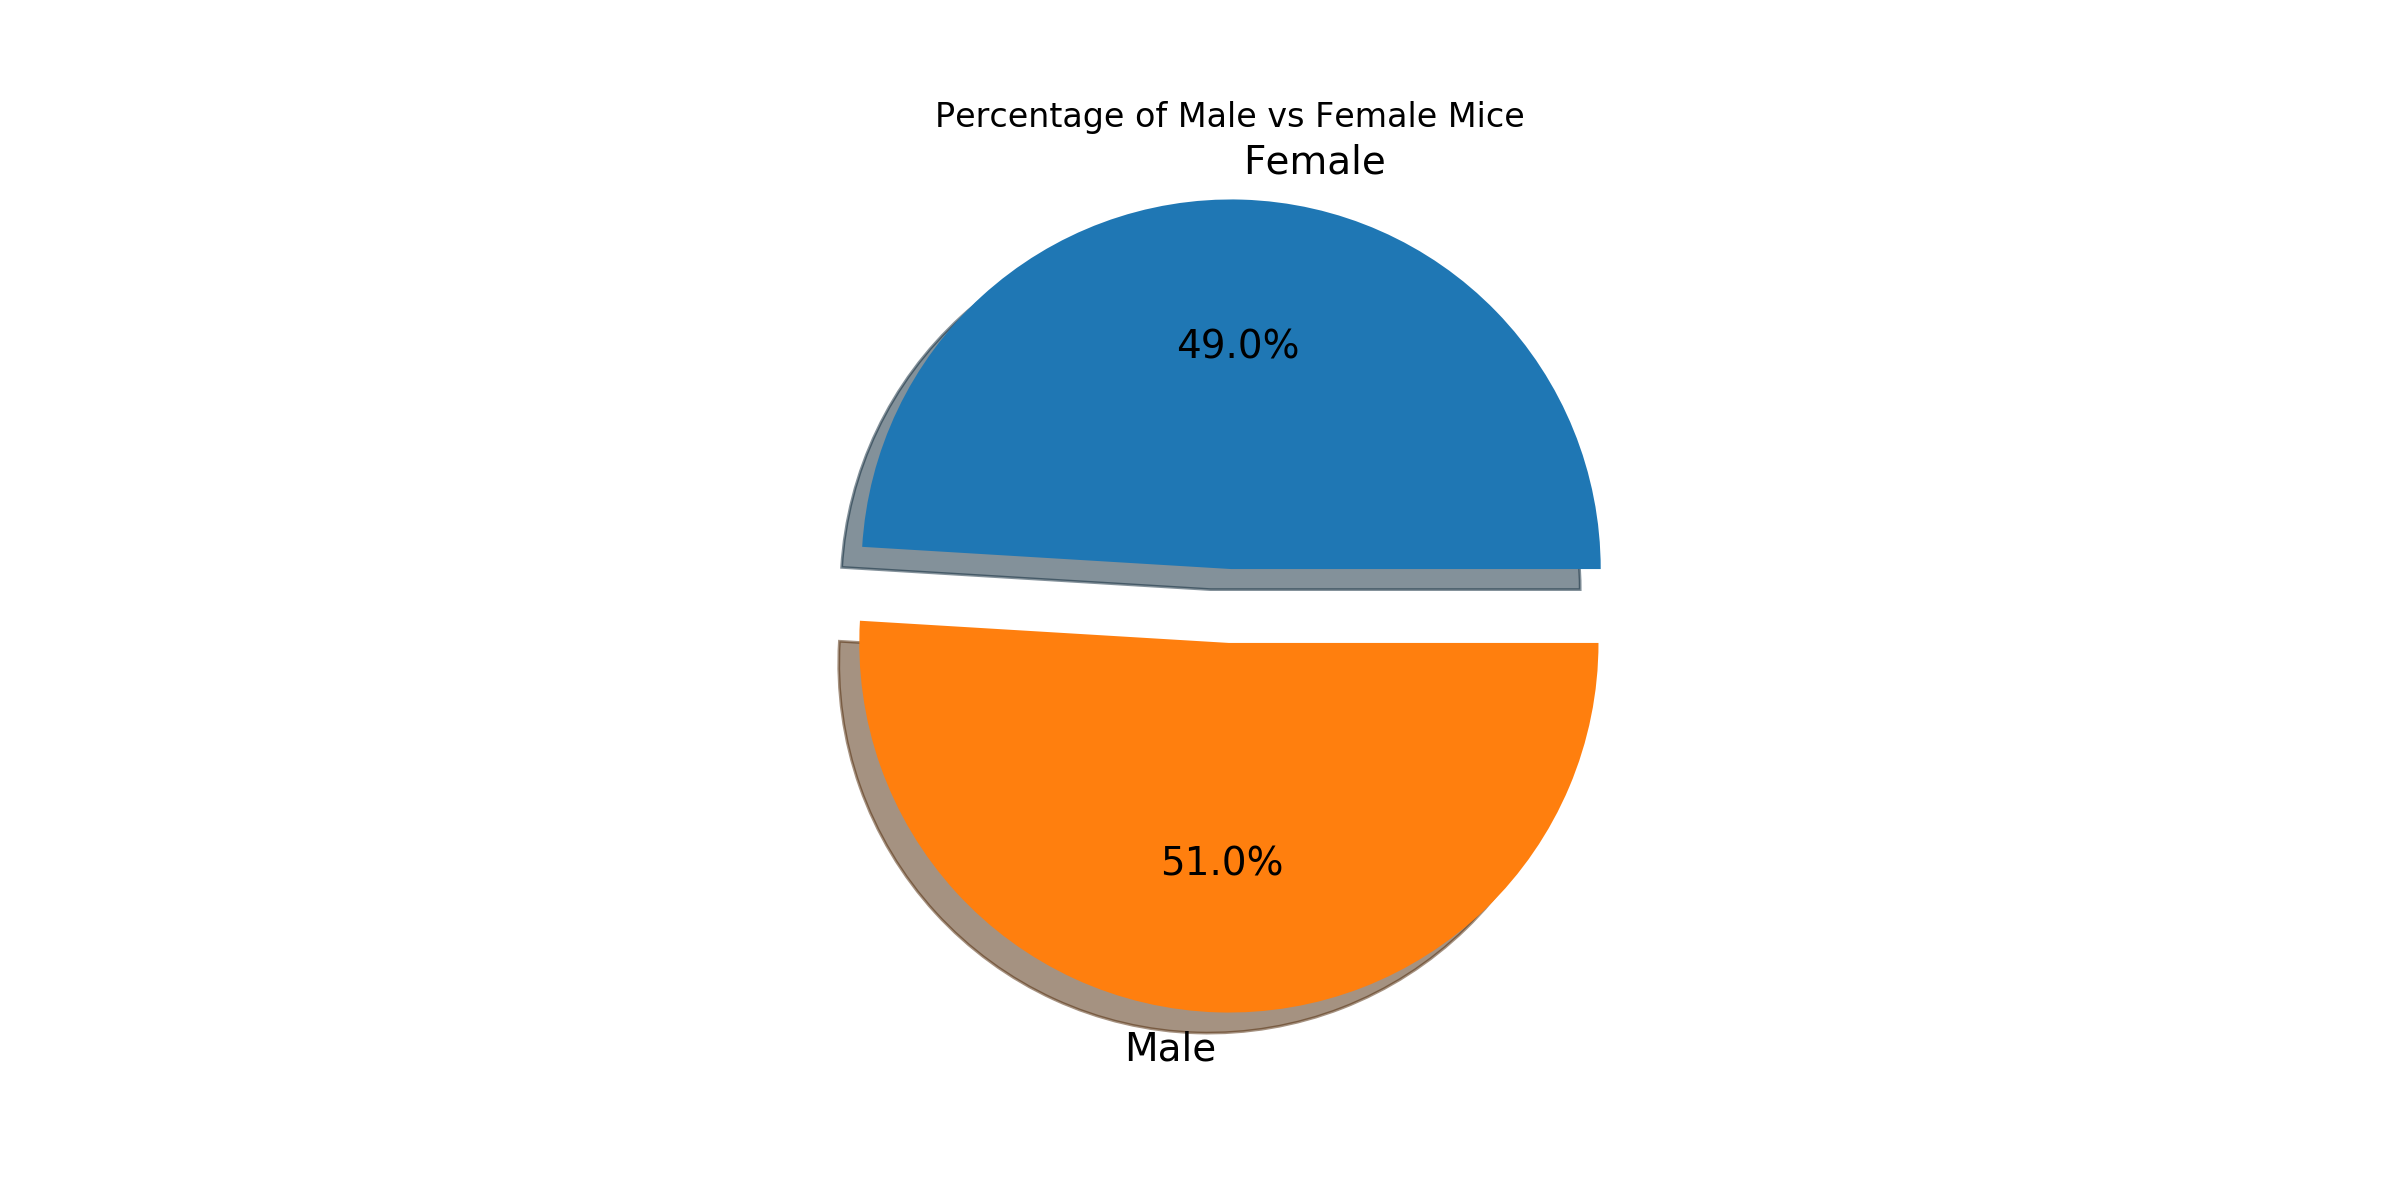

In [184]:
#create pie plot using pandas
plt.figure(figsize=(12,6))
ax1 = plt.subplot()
explode = (0.1,0.1)
sex_of_mice.plot(kind="pie", y = "Mouse ID", autopct='%1.1f%%', ax=ax1, legend=False,shadow=True, fontsize=14, explode=explode)

plt.title("Percentage of Male vs Female Mice")
plt.xlabel("")
plt.ylabel("")
plt.show()

In [185]:
plt.clf()
plt.cla()
plt.close()

<IPython.core.display.Javascript object>


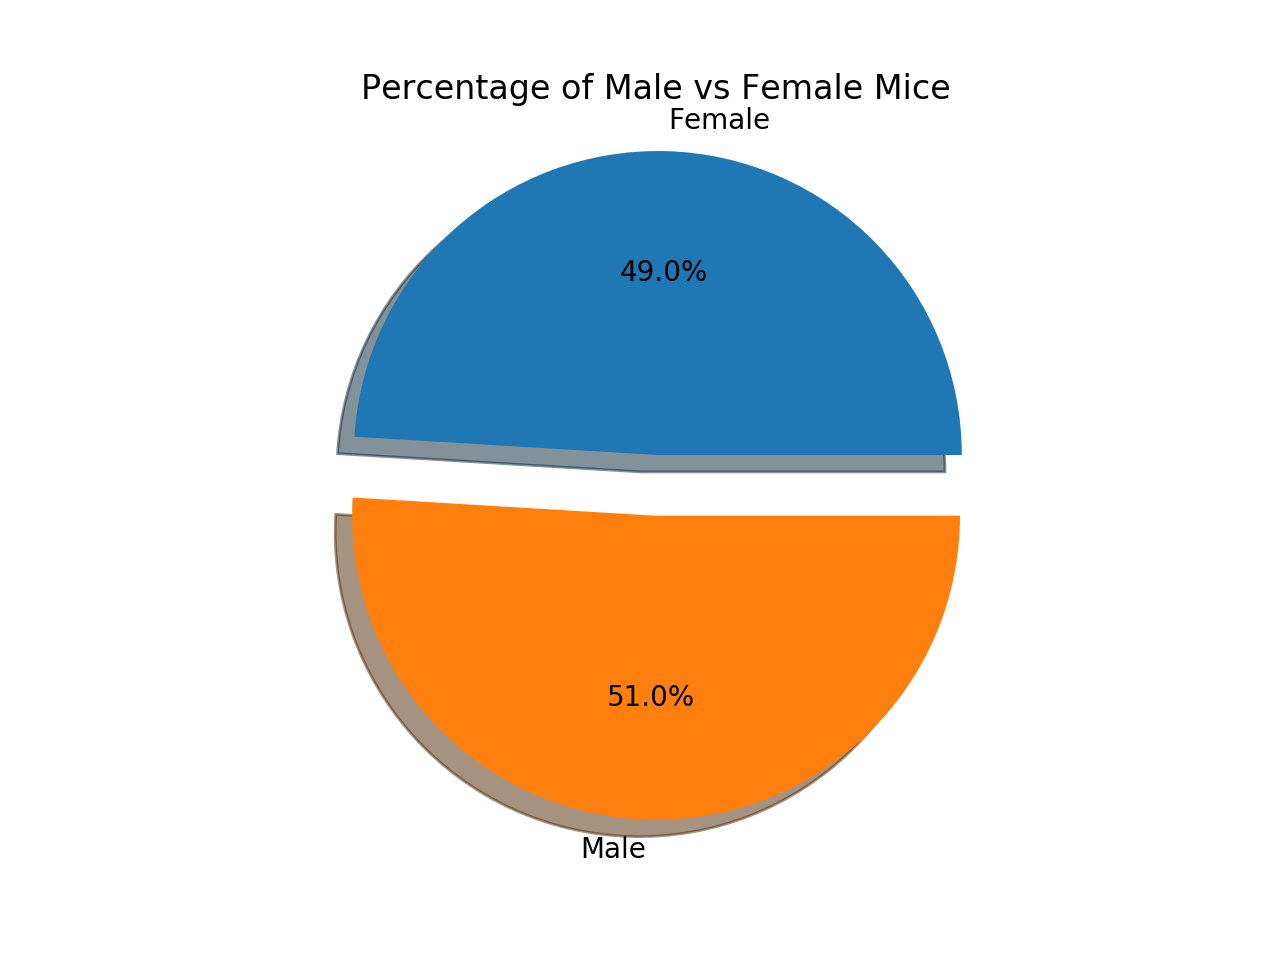

In [186]:
# Generate a pie plot showing the distribution of 
#female versus male mice using pyplot

percentage_sex = (combo_mouse_study.groupby(['Sex'])['Mouse ID'].count()).tolist()

labels=["Female","Male"]

plt.pie(percentage_sex, labels=labels, autopct="%1.1f%%", shadow=True, explode=explode)
plt.axis("equal")
plt.title("Percentage of Male vs Female Mice")

plt.show()

In [187]:
plt.clf()
plt.cla()
plt.close()

## Quartiles, Outliers and Boxplots

In [205]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#separate out 4 drug regimens and add to orginal combo df
four_regimens_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
four_regimens = combo_mouse_study[combo_mouse_study['Drug Regimen'].isin(four_regimens_list)]

# Start by getting the last (greatest) timepoint for each mouse
#groupby and pull out the last element in the tumor volume
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

last_tumor = four_regimens.groupby(['Drug Regimen', 'Mouse ID']).agg(final_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(2)

last_tumor



final_tumor_size
Drug Regimen Mouse ID                  
Capomulin    b128                 38.98
             b742                 38.94
             f966                 30.49
             g288                 37.07
             g316                 40.16
...                                 ...
Ramicane     s508                 30.28
             u196                 40.67
             w678                 43.17
             y449                 44.18
             z578                 30.64

[100 rows x 1 columns]

In [206]:
#rearrange data in df
last_tumor_arranged = last_tumor.stack(level=0).unstack(level=0)
last_tumor_arranged

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,final_tumor_size,NaN,NaN,67.97,NaN
a251,final_tumor_size,NaN,NaN,65.53,NaN
a275,final_tumor_size,NaN,63.00,NaN,NaN
a411,final_tumor_size,NaN,NaN,NaN,38.41
a444,final_tumor_size,NaN,NaN,NaN,43.05
...,...,...,...,...,...
y769,final_tumor_size,NaN,68.59,NaN,NaN
y793,final_tumor_size,31.9,NaN,NaN,NaN
y865,final_tumor_size,NaN,64.73,NaN,NaN


In [207]:
# Put treatments into a list for for loop (and later for plot labels)
counter = 0

for regimen in four_regimens_list:
    quartiles = last_tumor_arranged[regimen].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq +(1.5*iqr),2)
    
    if counter ==0:
        print (f"~~~~~~~~~")
        print (f"{regimen} IQR data is:")
        print(f"The lower quartile of {regimen} is: {lowerq}")
        print(f"The upper quartile of {regimen} is: {upperq}")
        print(f"The interquartile range of {regimen} is: {iqr}")
        print(f"The the median of {regimen} is: {quartiles[0.5]} ")
        print(f"Values below {lower_bound} for {regimen} could be outliers.")
        print(f"Values above {upper_bound} for {regimen} could be outliers.")
        print(f"~~~~~~~~~")
        counter += 1

# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
    

~~~~~~~~~
Capomulin IQR data is:
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.13 
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
~~~~~~~~~


In [208]:
boxplot = []

for regimen in four_regimens_list:
    boxplot.append(list(last_tumor_arranged[regimen].dropna()))

<IPython.core.display.Javascript object>


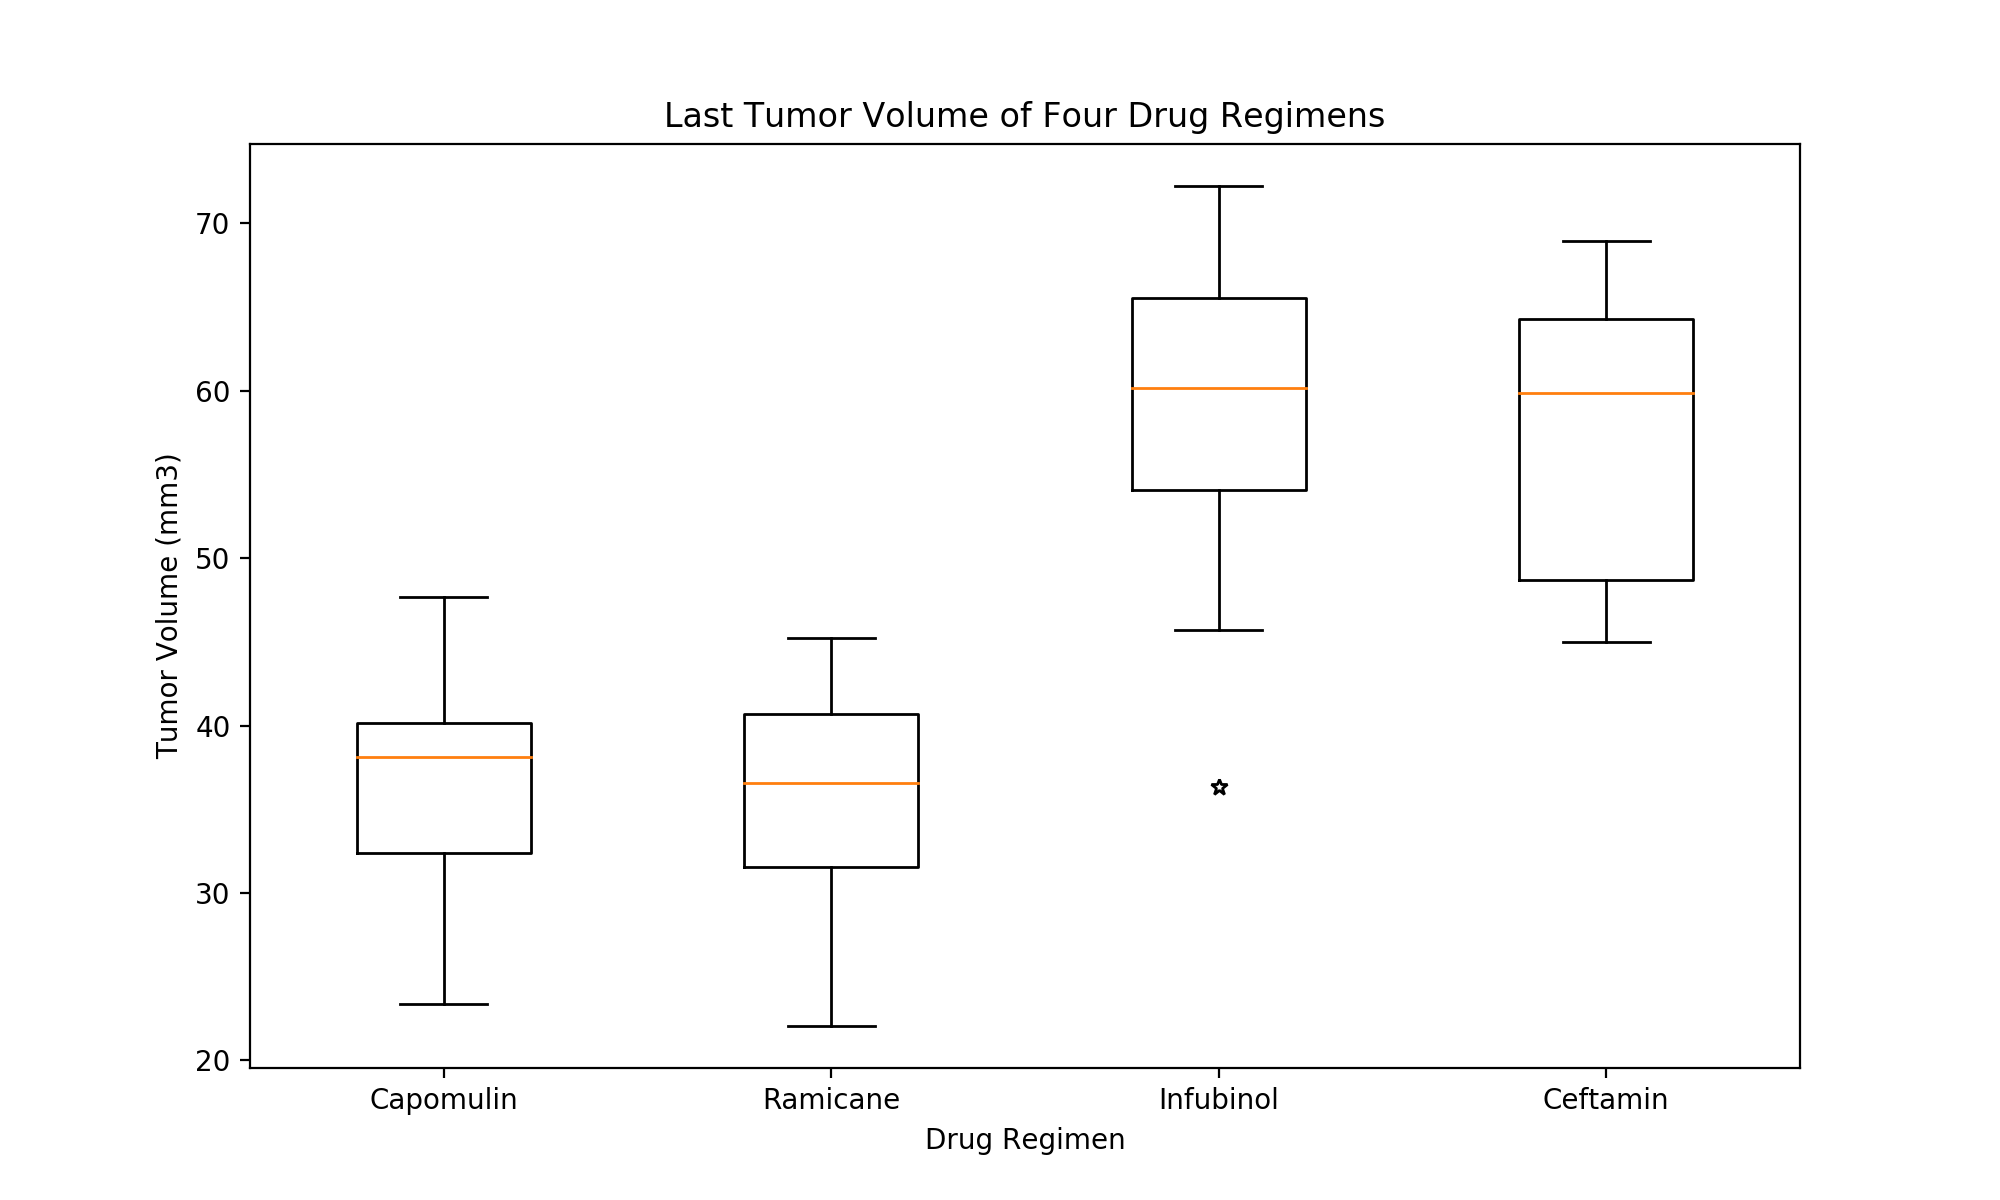

In [209]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax = plt.subplots(figsize=(10,6))
ax.set_title('Last Tumor Volume of Four Drug Regimens')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(boxplot, notch=0, sym='*')
plt.xticks([1,2,3,4],four_regimens_list)

plt.show()

In [210]:
plt.clf()
plt.cla()
plt.close()

## Line and Scatter Plots

In [211]:
#Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Part 1: separate out capomulin data only and isolate one mouseID x401
capomulin = combo_mouse_study.loc[combo_mouse_study['Drug Regimen']=='Capomulin']
capomulin = capomulin.reset_index()
#separate out mouseIDx401
capomulin_x401 = capomulin.loc[capomulin['Mouse ID']=='x401']
#reorganize data with only timepoint and tumor volume for x401
capomulin_x401 = capomulin_x401.loc[:,["Timepoint","Tumor Volume (mm3)"]]
capomulin_x401

,Timepoint,Tumor Volume (mm3)
10,0,45.000000
11,5,45.473753
12,10,39.113891
13,15,39.776250
14,20,36.065835
15,25,36.617120
16,30,32.915292
17,35,30.206825
18,40,28.167397
19,45,28.484033


<IPython.core.display.Javascript object>


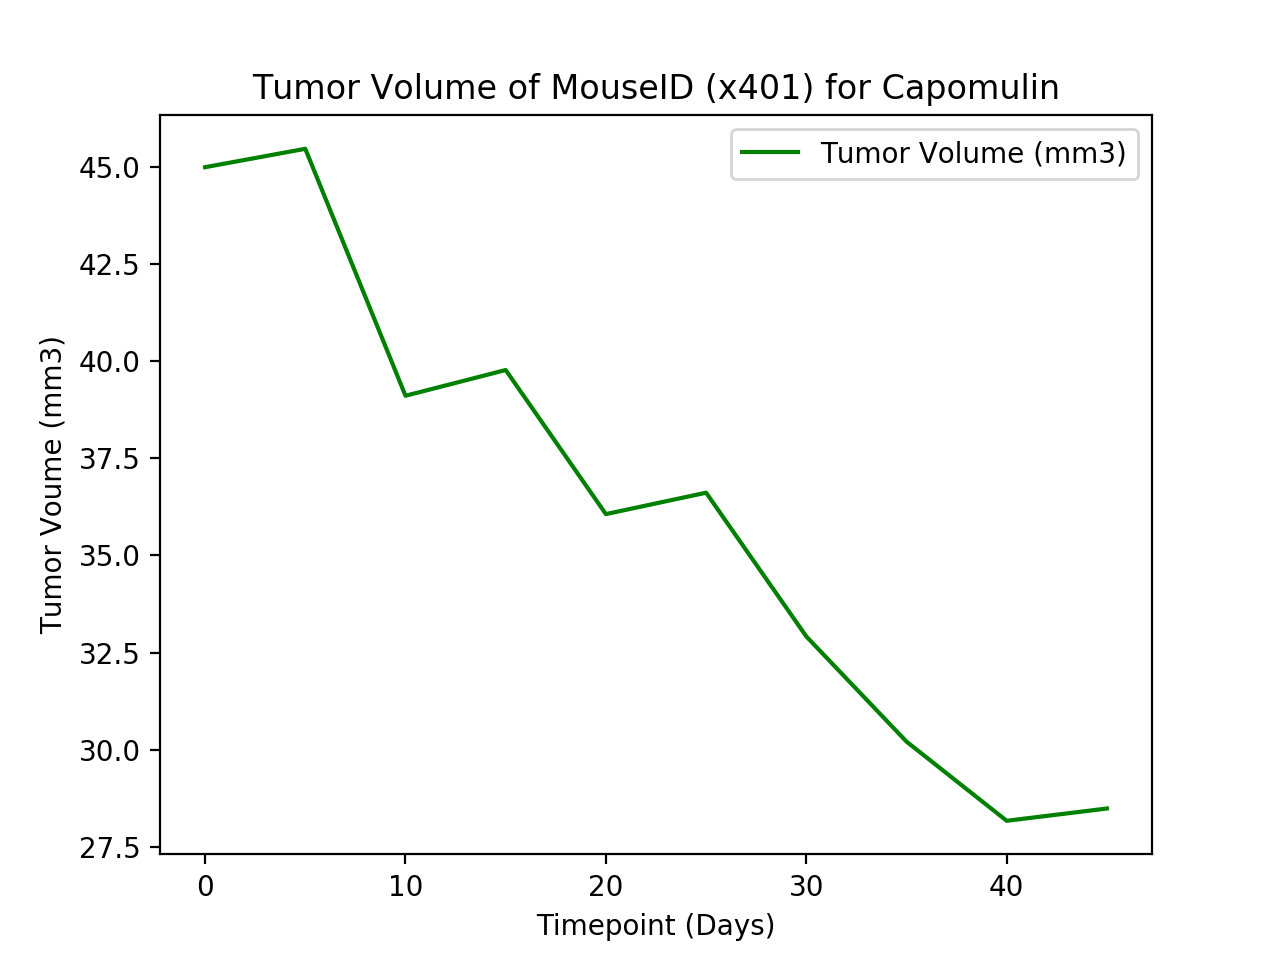

Text(0.5, 1.0, 'Tumor Volume of MouseID (x401) for Capomulin')

In [212]:
#Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_x401 = capomulin_x401.reset_index(drop=True)
capomulin_x401.set_index("Timepoint").plot(color='green')

plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Voume (mm3)")
plt.title("Tumor Volume of MouseID (x401) for Capomulin")


In [213]:
plt.clf()
plt.cla()
plt.close()

In [214]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
#for the Capomulin regimen
cap_only = combo_mouse_study.loc[combo_mouse_study['Drug Regimen']=='Capomulin']

#separate out mouse ID, weight, tumor volume
cap_weight_vol = cap_only.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]

#calc average tumor vol 
cap_weight_vol_avg = pd.DataFrame(cap_weight_vol.groupby(["Mouse ID","Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
cap_weight_vol_avg


,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344
5,i557,24,44.805810
6,i738,20,39.141053
7,j119,23,44.465236
8,j246,21,43.216925
9,l509,21,44.434474


<IPython.core.display.Javascript object>


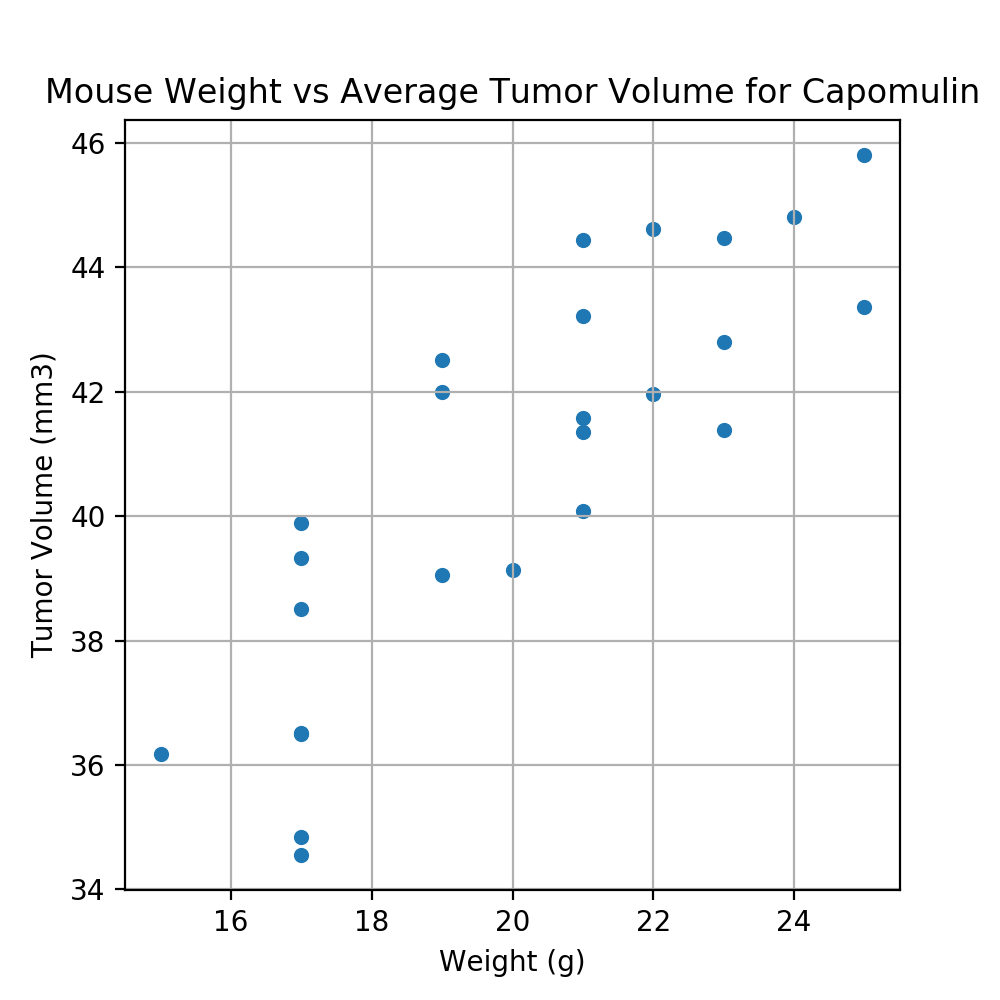

In [215]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
cap_weight_vol_avg.plot(kind='scatter', x = "Weight (g)", y ="Tumor Volume (mm3)", figsize=(5,5), grid=True)

plt.title("Mouse Weight vs Average Tumor Volume for Capomulin")

plt.show()


In [216]:
plt.clf()
plt.cla()
plt.close()

## Correlation and Regression

In [217]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
cap_weight_vol_avg_cr = cap_weight_vol_avg.set_index('Mouse ID')
cap_weight_vol_avg_cr.head()

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344


In [218]:
#correlation
corr = st.pearsonr(cap_weight_vol_avg_cr['Weight (g)'], cap_weight_vol_avg_cr["Tumor Volume (mm3)"])
print(f"Correlation coefficient between mouse weight and tumor volume in Capomulin is {round(corr[0],2)}")

Correlation coefficient between mouse weight and tumor volume in Capomulin is 0.84


<IPython.core.display.Javascript object>


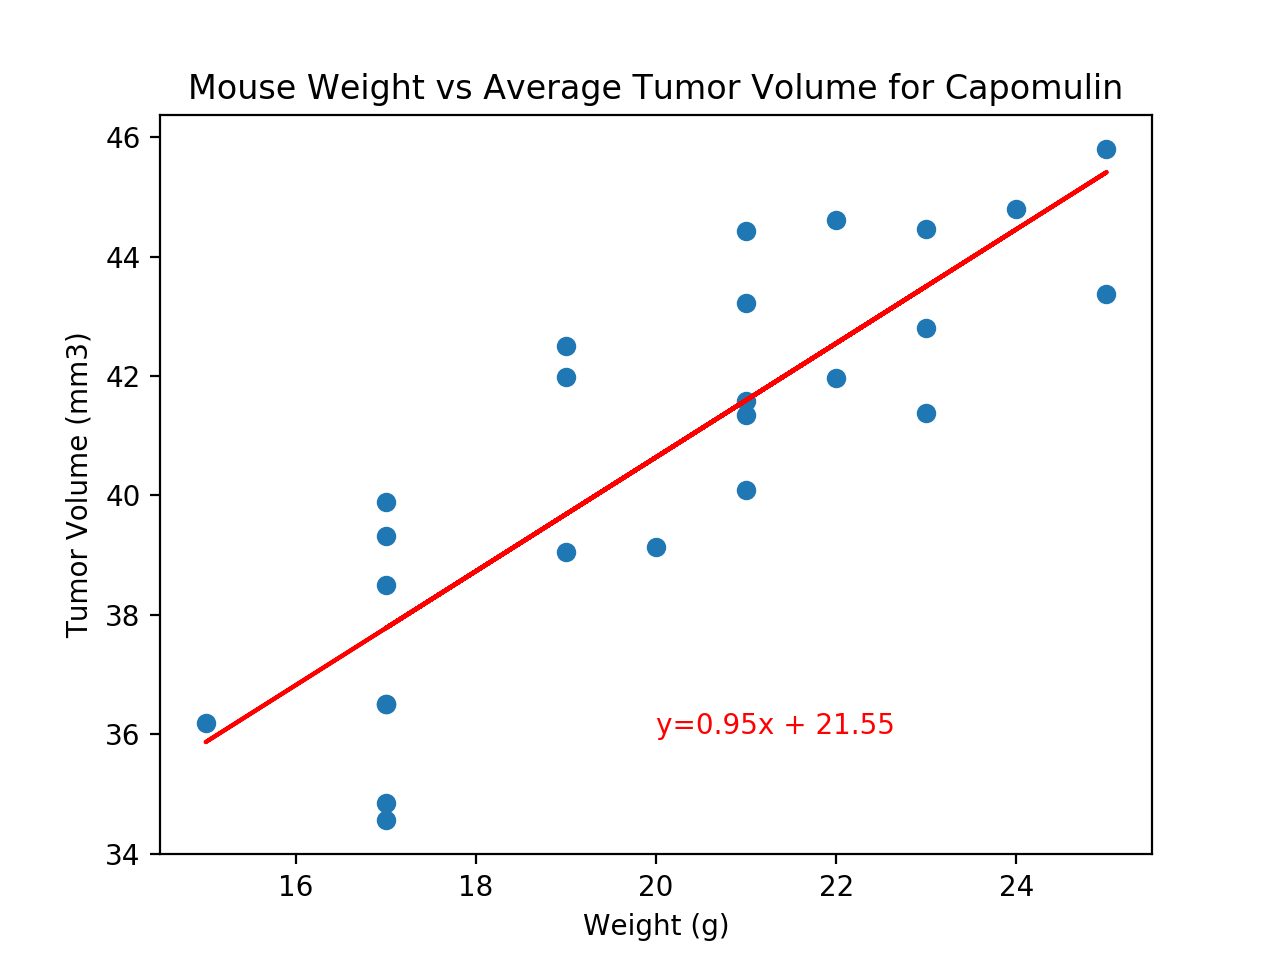

The r-squared is: 0.8419363424694718
The equation for linear regression is: y=0.95x + 21.55


In [220]:
#add linear regression and r2 with previous plot
x_values = cap_weight_vol_avg_cr['Weight (g)']
y_values = cap_weight_vol_avg_cr['Tumor Volume (mm3)']
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)
regress_val = x_values * slope + intercept

#regression line equation
reg_equation = f'y={str(round(slope,2))}x + {str(round(intercept,2))}'

#plotting everything
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_val,"r-")
plt.annotate(reg_equation,(20,36),fontsize=10, color = 'red')
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue}")
print(f"The equation for linear regression is: {reg_equation}")

plt.show()
      
      
      

In [ ]:
plt.clf()
plt.cla()
plt.close()